# Wrangling the geographic data into the region of analysis

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [11]:
import matplotlib.pyplot as plt

## 1 Load data in dataframe
- load each country shape file
- construct dataframe

In [4]:
admin_files = ['ET_Admin1_2014', 'SD_Admin1_2014', 'SS_Admin1_2011', 'UG_Admin1_2014', \
               'KE_Admin1_2013', 'SO_Admin1_1990', 'TZ_Admin1_2012']
regions = gpd.GeoDataFrame()
for country in admin_files:
        country_gdf = gpd.read_file('zip:///Users/matthewmauer/ML/project/admin_zones/' + \
                                 country + '.zip!' + country + '.shp')
        regions = regions.append(country_gdf)

In [5]:
regions.shape

(138, 15)

## Filter and check data

In [8]:
regions = regions[['geometry', 'ADMIN0', 'ADMIN1']]

In [14]:
regions.head(2)

,geometry,ADMIN0,ADMIN1
0,"POLYGON ((38.78052 9.09681, 38.79296 9.08120, ...",Ethiopia,Addis Ababa
1,"POLYGON ((41.79105 10.99112, 41.77117 10.99454...",Ethiopia,Afar


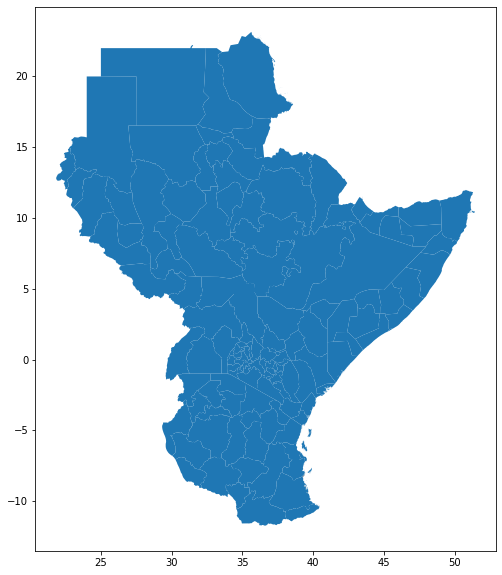

In [12]:
fig, ax = plt.subplots(1, figsize=(10, 10))

regions.plot(ax=ax)

## Write

In [15]:
regions.to_file('regions.geojson', driver='GeoJSON')